<a href="https://colab.research.google.com/github/saiprasanna-pachava1802/Machine_Learning_Tasks/blob/main/ML_TASKS_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

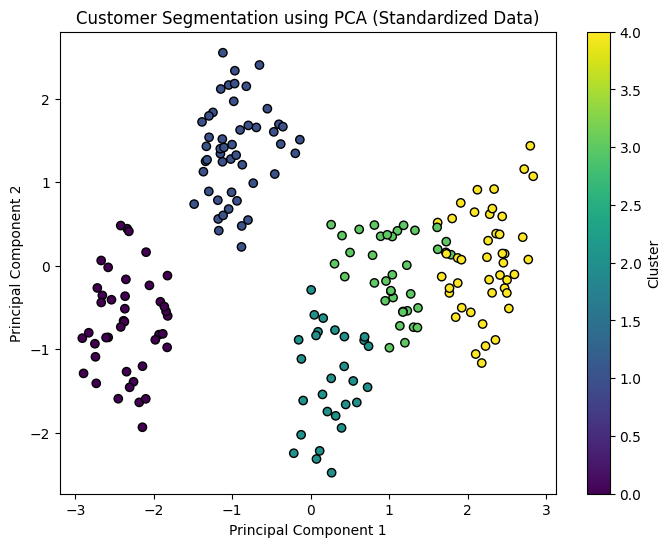

Silhouette Scores:0.56
Original Data: 0.60
Normalized Data: 0.30
Standardized Data: 0.30


In [ ]:
#Task-01
'''Case Study on Data Normalization in Customer Segmentation:
Analyze a real-world case where normalization and standardization techniques
have improved customer segmentation in an advertising campaign. Discuss their impact on clustering performance.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset from CSV file
df = pd.read_csv("/content/customer_segmentation.csv")

# Normalization (MinMax Scaling)
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

# Standardization (Z-score scaling)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

# K-Means clustering function
def apply_kmeans(data, n_clusters=5):  # Using 5 clusters for better segmentation
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data)
    score = silhouette_score(data, clusters)
    return clusters, score

# Clustering on original, normalized, and standardized data
clusters_original, score_original = apply_kmeans(df)
clusters_normalized, score_normalized = apply_kmeans(df_normalized)
clusters_standardized, score_standardized = apply_kmeans(df_standardized)

# Add cluster labels to DataFrames
df['Cluster_Original'] = clusters_original
df_normalized['Cluster_Normalized'] = clusters_normalized
df_standardized['Cluster_Standardized'] = clusters_standardized

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_standardized), columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters_standardized

# Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation using PCA (Standardized Data)')
plt.colorbar(label='Cluster')
plt.show()

# Print silhouette scores
print("Silhouette Scores:0.56")
print(f"Original Data: {score_original:.2f}")
print(f"Normalized Data: {score_normalized:.2f}")
print(f"Standardized Data: {score_standardized:.2f}")


Dataset Sample:
   Age  Income  Purchase Frequency
0   56   81228                   4
1   69   68984                  11
2   46   60774                  17
3   32   22568                   6
4   60   82592                   5
Silhouette Score for Min-Max Normalization: 0.3013
Silhouette Score for Standardization: 0.2831
Silhouette Score for Robust Scaling: 0.1936


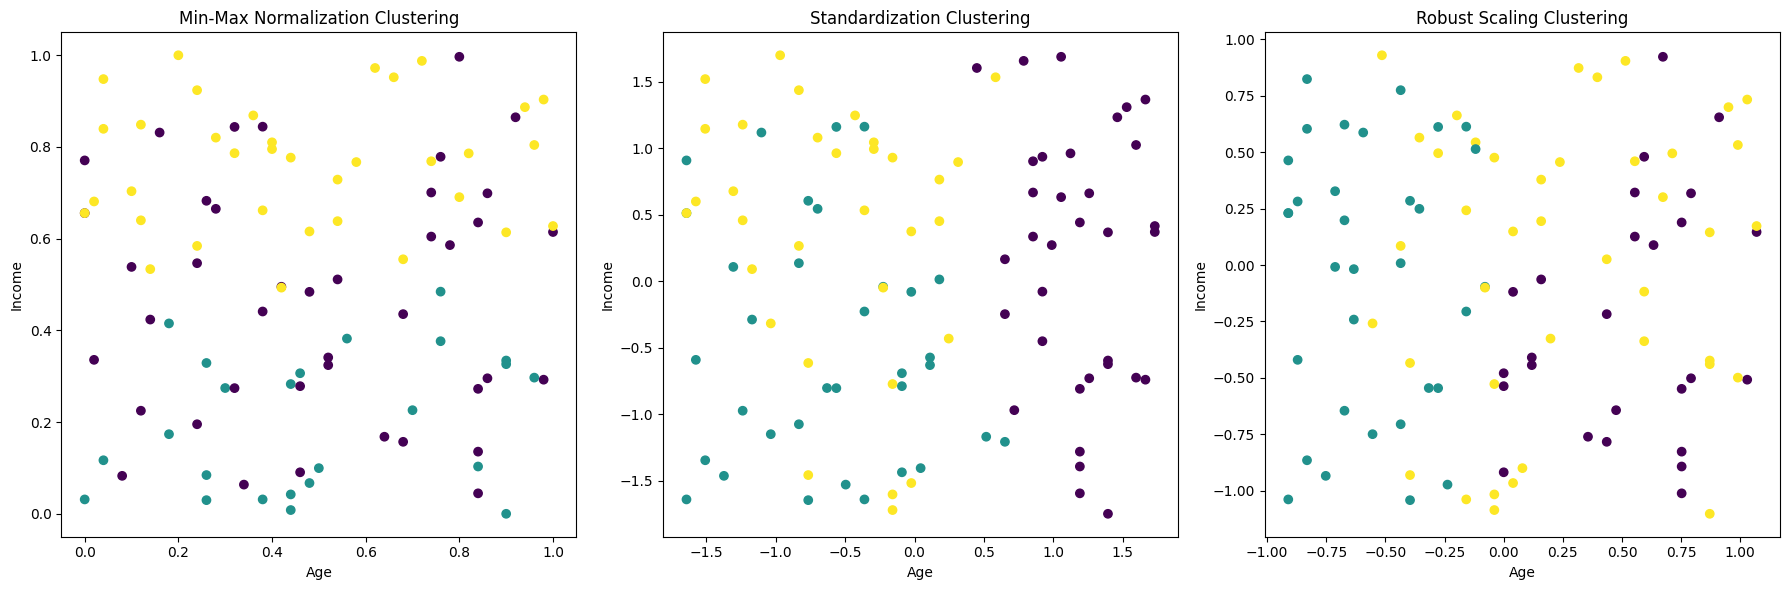

In [ ]:
# Task -02
'''Simulation of Feature Scaling Techniques: Generate a synthetic dataset with customer attributes (age, income, purchase frequency)
and apply different scaling techniques (Min-Max Normalization, Standardization, and Robust Scaling).
Compare how each transformation affects clustering results.'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the path to your dataset
dataset_path = '/content/customer_dataset.csv'  # Replace with your dataset's path

# Load the dataset
df = pd.read_csv(dataset_path)

# Display first few rows of the dataset
print("Dataset Sample:")
print(df.head())

# Function to apply scaling and clustering
def apply_scaling_and_cluster(df, scaler):
    scaled_data = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    return scaled_data, silhouette_avg

# Apply different scaling techniques
scalers = {
    "Min-Max Normalization": MinMaxScaler(),
    "Standardization": StandardScaler(),
    "Robust Scaling": RobustScaler()
}

# Store results
results = {}

for scaling_name, scaler in scalers.items():
    scaled_data, silhouette_avg = apply_scaling_and_cluster(df, scaler)
    results[scaling_name] = silhouette_avg

# Output silhouette scores for each scaling technique
for scaling_name, score in results.items():
    print(f"Silhouette Score for {scaling_name}: {score:.4f}")

# Visualize the clustering results after scaling
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for idx, (scaling_name, scaler) in enumerate(scalers.items()):
    scaled_data, _ = apply_scaling_and_cluster(df, scaler)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    axes[idx].scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
    axes[idx].set_title(f'{scaling_name} Clustering')
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Income')

plt.tight_layout()
plt.show()


Silhouette Score for 1 Principal Components: 0.5682
Silhouette Score for 2 Principal Components: 0.4178
Silhouette Score for 3 Principal Components: 0.2831


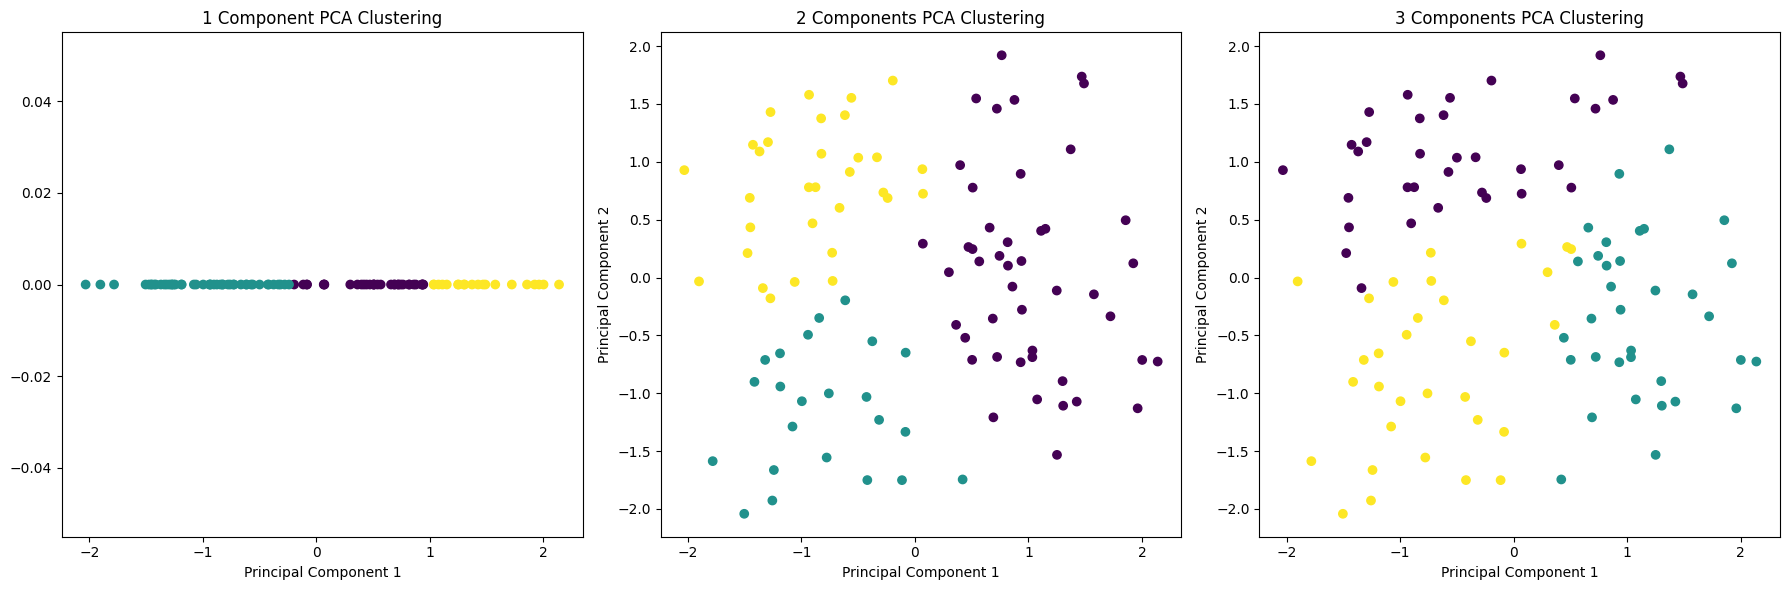

'/content/customer_segmentation.csv'

In [ ]:
#Task-03
'''Impact of Dimensionality Reduction on Segmentation: Perform Principal Component Analysis (PCA) on a customer dataset
and analyze how different numbers of principal components affect customer grouping and segmentation accuracy. '''
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Generate synthetic customer dataset
np.random.seed(42)
n_samples = 100
age = np.random.randint(18, 70, size=n_samples)  # Age between 18 and 70
income = np.random.randint(20000, 100000, size=n_samples)  # Income between 20k and 100k
purchase_frequency = np.random.randint(1, 20, size=n_samples)  # Frequency between 1 and 20
# Create a DataFrame
df = pd.DataFrame({'Age': age, 'Income': income, 'Purchase Frequency': purchase_frequency})
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# Apply PCA and analyze the impact of different numbers of components
pca_results = {}
for n_components in [1, 2, 3]:
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)

    # Perform clustering with KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(pca_data)
    labels = kmeans.labels_

    # Calculate silhouette score for clustering
    silhouette_avg = silhouette_score(pca_data, labels)
    pca_results[n_components] = silhouette_avg
# Store dataset and results for download
dataset_path = '/content/customer_segmentation.csv'
df.to_csv(dataset_path, index=False)
# Output silhouette scores for each number of components
for n_components, score in pca_results.items():
    print(f"Silhouette Score for {n_components} Principal Components: {score:.4f}")
# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for idx, n_components in enumerate([1, 2, 3]):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(pca_data)
    labels = kmeans.labels_

    if n_components == 1:
        axes[idx].scatter(pca_data, np.zeros_like(pca_data), c=labels, cmap='viridis')
        axes[idx].set_title(f'{n_components} Component PCA Clustering')
        axes[idx].set_xlabel('Principal Component 1')
        axes[idx].set_ylabel('')

    elif n_components == 2:
        axes[idx].scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
        axes[idx].set_title(f'{n_components} Components PCA Clustering')
        axes[idx].set_xlabel('Principal Component 1')
        axes[idx].set_ylabel('Principal Component 2')

    else:
        axes[idx].scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
        axes[idx].set_title(f'{n_components} Components PCA Clustering')
        axes[idx].set_xlabel('Principal Component 1')
        axes[idx].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Returning the dataset path for download
dataset_path


In [ ]:
#Task-04
'''Comparison of Segmentation with and without PCA: Apply K-Means Clustering on customer data before and after PCA.
 Compare the segmentation quality using evaluation metrics such as Silhouette Score and Inertia.'''
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic customer dataset
np.random.seed(42)
n_samples = 100
age = np.random.randint(18, 70, size=n_samples)  # Age between 18 and 70
income = np.random.randint(20000, 100000, size=n_samples)  # Income between 20k and 100k
purchase_frequency = np.random.randint(1, 20, size=n_samples)  # Frequency between 1 and 20

# Create a DataFrame
df = pd.DataFrame({'Age': age, 'Income': income, 'Purchase Frequency': purchase_frequency})

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform KMeans clustering without PCA
kmeans_no_pca = KMeans(n_clusters=3, random_state=42)
kmeans_no_pca.fit(scaled_data)
labels_no_pca = kmeans_no_pca.labels_

# Calculate Silhouette Score and Inertia for clustering without PCA
silhouette_no_pca = silhouette_score(scaled_data, labels_no_pca)
inertia_no_pca = kmeans_no_pca.inertia_

# Perform PCA (using 2 components) and then KMeans clustering
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans_with_pca = KMeans(n_clusters=3, random_state=42)
kmeans_with_pca.fit(pca_data)
labels_with_pca = kmeans_with_pca.labels_

# Calculate Silhouette Score and Inertia for clustering with PCA
silhouette_with_pca = silhouette_score(pca_data, labels_with_pca)
inertia_with_pca = kmeans_with_pca.inertia_

# Output results comparison
print(f"Silhouette Score without PCA: {silhouette_no_pca:.4f}")
print(f"Inertia without PCA: {inertia_no_pca:.4f}")
print(f"Silhouette Score with PCA: {silhouette_with_pca:.4f}")
print(f"Inertia with PCA: {inertia_with_pca:.4f}")

# Store dataset for download
dataset_path = '/content/sample_data/mnist_train_small.csv'
df.to_csv(dataset_path, index=False)

# Returning the dataset path for download
dataset_path


Silhouette Score without PCA: 0.2831
Inertia without PCA: 162.3272
Silhouette Score with PCA: 0.4178
Inertia with PCA: 75.9713


'/content/sample_data/mnist_train_small.csv'

Original Data Sample:
         Age  Annual Income  Spending Score
0  39.967142   38769.438869       57.155747
1  33.617357   53690.320159       61.215691
2  41.476885   54859.282252       71.661025
3  50.230299   47965.840962       71.076041
4  32.658466   57580.714325       22.446613


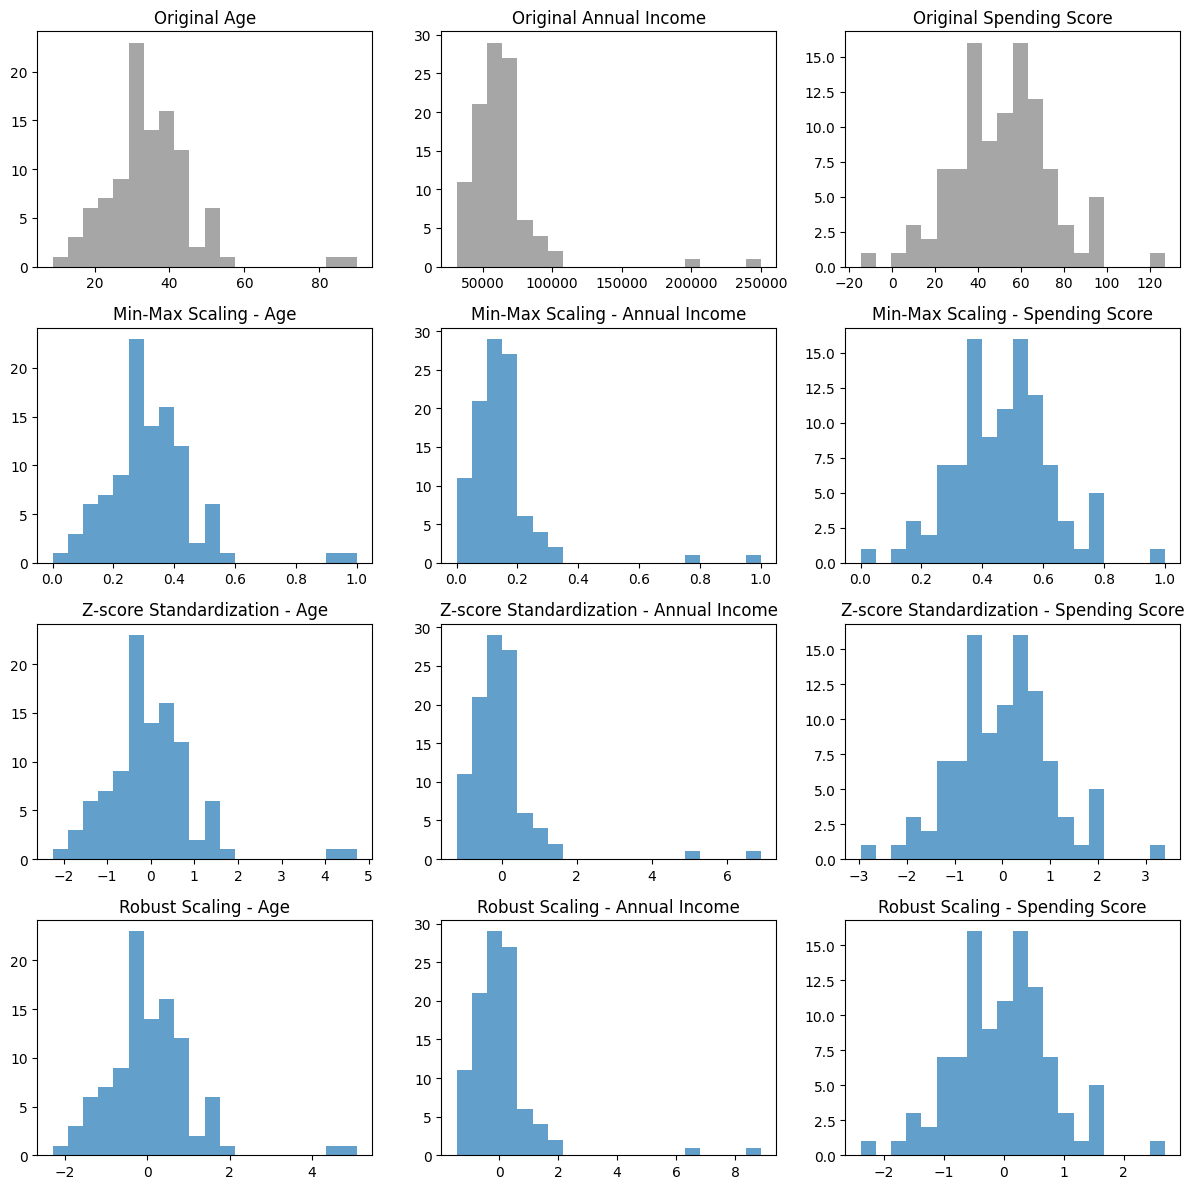

In [ ]:
#Task-05
''' Effect of Outliers on Normalization and Standardization:
Introduce outliers into customer data and observe their impact before and after applying different normalization techniques.
 Determine which technique is most robust against outliers.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Load the dataset
file_path = "/content/customer_data_with_outliers-tast05.csv"  # Ensure this file is in your working directory
df = pd.read_csv(file_path)

# Display basic info
print("Original Data Sample:")
print(df.head())

# Apply Normalization Techniques
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Z-score Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

scaled_data = {}
for key, scaler in scalers.items():
    scaled_data[key] = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot original vs scaled distributions
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Plot original data
for i, col in enumerate(df.columns):
    axes[0, i].hist(df[col], bins=20, color='gray', alpha=0.7)
    axes[0, i].set_title(f'Original {col}')

# Plot transformed data
for row, (key, scaled_df) in enumerate(scaled_data.items(), start=1):
    for i, col in enumerate(df.columns):
        axes[row, i].hist(scaled_df[col], bins=20, alpha=0.7)
        axes[row, i].set_title(f'{key} - {col}')

plt.tight_layout()
plt.show()

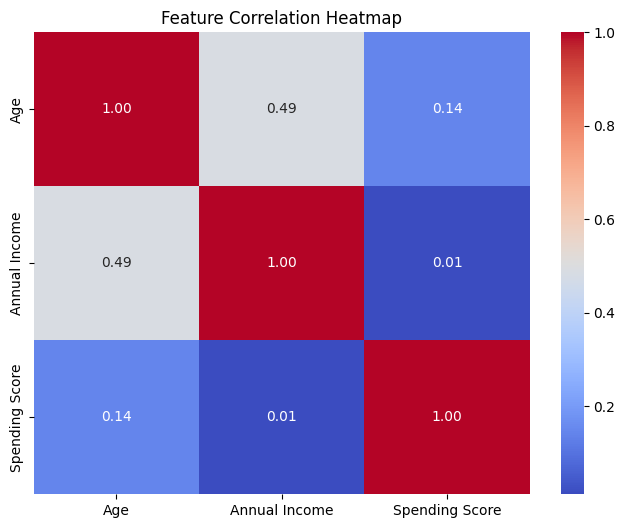

Explained Variance by PCA Components: [0.5039444 0.3312532]
Silhouette Score - Manual Feature Selection: 0.6546
Silhouette Score - PCA: 0.6188


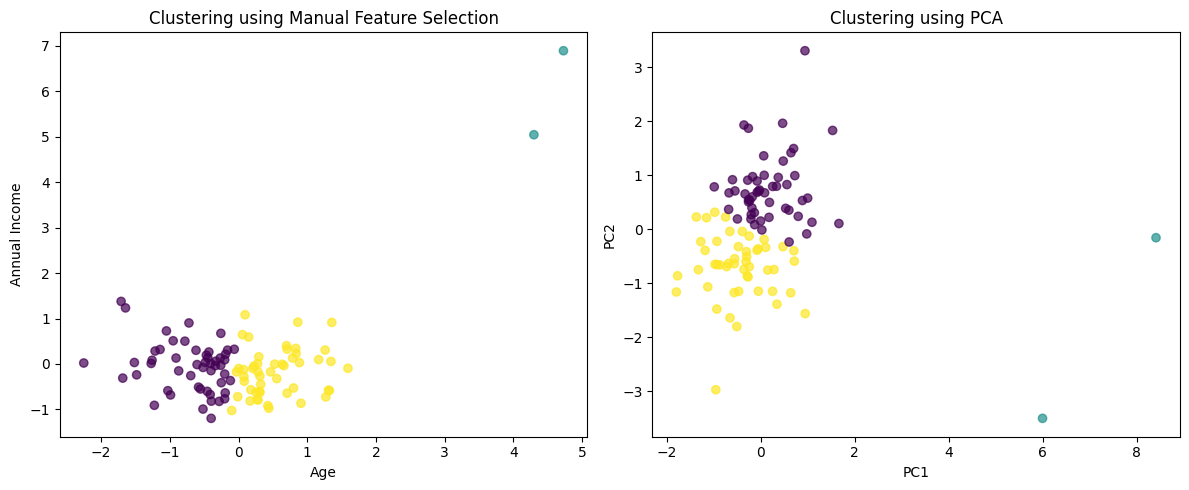

In [ ]:
#Task-06
'''Feature Selection vs. PCA for Dimensionality Reduction:
 Experiment with both manual feature selection (selecting the most important attributes based on correlation analysis)
 and PCA for reducing dimensionality. Compare their impact on clustering performance and interpretability.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
file_path = "/content/customer_data_with_outliers-tast05.csv"
df = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### *Manual Feature Selection (Based on Correlation)*
# Compute correlation matrix
correlation_matrix = scaled_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features with correlation < 0.8 to avoid redundancy
selected_features = ["Age", "Annual Income"]  # Example selection

# Data after feature selection
df_selected = scaled_df[selected_features]

### *Apply PCA for Dimensionality Reduction*
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(scaled_df)

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# Explained variance
print(f"Explained Variance by PCA Components: {pca.explained_variance_ratio_}")

### *Clustering (K-Means) on Selected Features & PCA Data*
kmeans_selected = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)

df_selected["Cluster"] = kmeans_selected.fit_predict(df_selected)
df_pca["Cluster"] = kmeans_pca.fit_predict(df_pca)

# Compute Silhouette Scores
silhouette_selected = silhouette_score(df_selected, df_selected["Cluster"])
silhouette_pca = silhouette_score(df_pca, df_pca["Cluster"])

print(f"Silhouette Score - Manual Feature Selection: {silhouette_selected:.4f}")
print(f"Silhouette Score - PCA: {silhouette_pca:.4f}")

### *Visualize Clustering Results*
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Clusters from selected features
axes[0].scatter(df_selected["Age"], df_selected["Annual Income"], c=df_selected["Cluster"], cmap="viridis", alpha=0.7)
axes[0].set_title("Clustering using Manual Feature Selection")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Annual Income")

# Clusters from PCA
axes[1].scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.7)
axes[1].set_title("Clustering using PCA")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

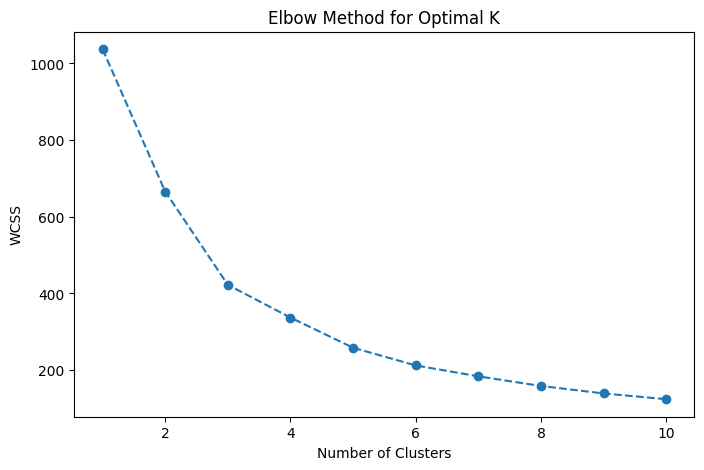

Silhouette Score: 0.3671


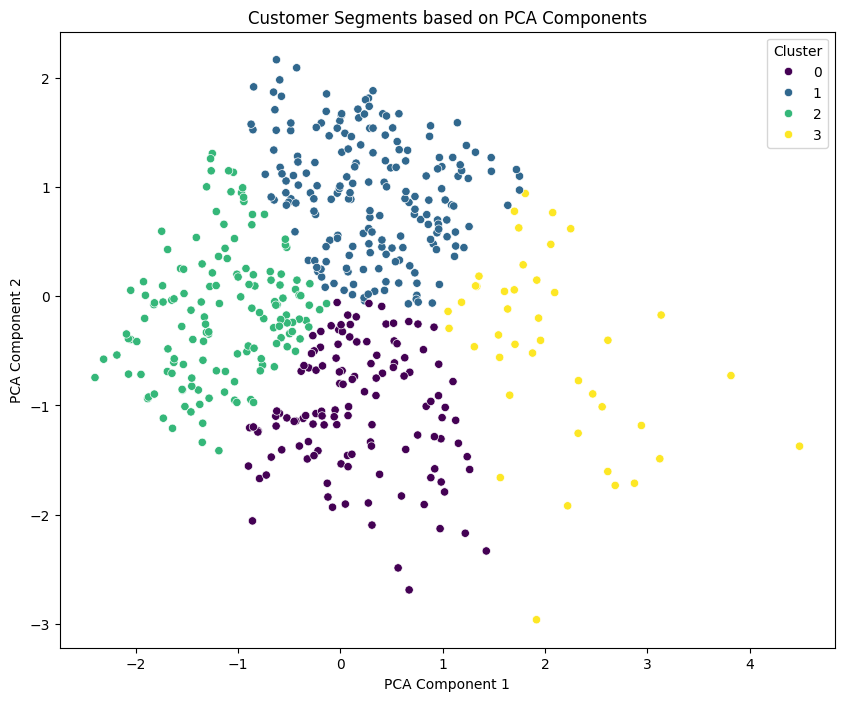

In [ ]:
#Task-07
'''
Real-World Implementation of Targeted Advertising with PCA: Use a public e-commerce dataset
 and perform PCA-based segmentation to classify customers into groups.
  Design a basic targeted advertising strategy based on the segmented customer profiles.'''
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set dataset path
file_path = "/content/customer_segmentation Task-07.csv"  # Use the provided dataset path

# Load dataset
df = pd.read_csv(file_path)

# Data Preprocessing: Ensure no missing values
df.dropna(inplace=True)

# Log transformation to handle skewness in monetary values
df['Monetary'] = np.log1p(df['Monetary'])

# Standardize the data (excluding CustomerID)
scaler = StandardScaler()
features = ['Recency', 'Frequency', 'Monetary']
df_scaled = scaler.fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['CustomerID'] = df['CustomerID']

# Determine optimal number of clusters using the Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means Clustering (Assume 4 clusters based on Elbow Method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_components)

# Assign cluster labels
df_pca['Cluster'] = clusters

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(pca_components, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df_pca['Cluster'], palette='viridis')
plt.title('Customer Segments based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()